[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana3/2_ARMA.ipynb)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 5.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pandas.util._decorators import Appender

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess          # para simular proceso ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
import arch

import matplotlib.pyplot as plt

In [ ]:
diariosg = pd.read_csv('/content/drive/MyDrive/Cruso-ApsFinancieras/semana5/USD_MXN.csv', sep=';')
diariosg

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,5/4/2017,18.8200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6/4/2017,18.7405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/4/2017,18.6688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/4/2017,18.6787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/4/2017,18.7813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1300,30/3/2022,19.8560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,31/3/2022,19.8450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,1/4/2022,19.8350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303,4/4/2022,19.7880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cargar desde github
diariosg = pd.read_csv('https://raw.githubusercontent.com/MaxMitre/Aplicaciones-Financieras/main/Semana5/data/USD_MXN.csv', sep=';')

In [ ]:
diariosg

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,5/4/2017,18.8200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6/4/2017,18.7405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/4/2017,18.6688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/4/2017,18.6787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/4/2017,18.7813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1300,30/3/2022,19.8560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1301,31/3/2022,19.8450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1302,1/4/2022,19.8350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303,4/4/2022,19.7880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
diariosg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1305 non-null   object 
 1   Price       1305 non-null   float64
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
 9   Unnamed: 9  0 non-null      float64
dtypes: float64(9), object(1)
memory usage: 102.1+ KB


In [ ]:
diariosg = diariosg[['Date', 'Price']].copy()

In [ ]:
diariosg

,Date,Price
0,5/4/2017,18.8200
1,6/4/2017,18.7405
2,7/4/2017,18.6688
3,10/4/2017,18.6787
4,11/4/2017,18.7813
...,...,...
1300,30/3/2022,19.8560
1301,31/3/2022,19.8450
1302,1/4/2022,19.8350
1303,4/4/2022,19.7880


In [ ]:
diariosg.loc[0, 'Date']

'5/4/2017'

In [ ]:
type(diariosg.loc[0, 'Date'])

str

In [ ]:
diariosg['Date'] = pd.to_datetime(diariosg['Date'], dayfirst=True)

In [ ]:
diariosg

,Date,Price
0,2017-04-05,18.8200
1,2017-04-06,18.7405
2,2017-04-07,18.6688
3,2017-04-10,18.6787
4,2017-04-11,18.7813
...,...,...
1300,2022-03-30,19.8560
1301,2022-03-31,19.8450
1302,2022-04-01,19.8350
1303,2022-04-04,19.7880


In [ ]:
diariosg.loc[0, 'Date']

Timestamp('2017-04-05 00:00:00')

In [ ]:
# Revisar el tipo
type(diariosg['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
pd.to_datetime('2017-04-05') - pd.to_datetime('2016-04-05')

Timedelta('365 days 00:00:00')

In [ ]:
(pd.to_datetime('2017-04-05') - pd.to_datetime('2016-04-05')).days

365

## Las 2 siguientes celdas hacen lo mismo

In [ ]:
diariosg

,Date,Price
0,2017-04-05,18.8200
1,2017-04-06,18.7405
2,2017-04-07,18.6688
3,2017-04-10,18.6787
4,2017-04-11,18.7813
...,...,...
1300,2022-03-30,19.8560
1301,2022-03-31,19.8450
1302,2022-04-01,19.8350
1303,2022-04-04,19.7880


In [ ]:
# Cambiamos el DataFrame sobre la marcha
diariosg.set_index('Date', drop=True, inplace=True)

In [ ]:
diariosg

,Price
Date,
2017-04-05,18.8200
2017-04-06,18.7405
2017-04-07,18.6688
2017-04-10,18.6787
2017-04-11,18.7813
...,...
2022-03-30,19.8560
2022-03-31,19.8450
2022-04-01,19.8350


In [ ]:
# Aplicamos el método (funcionsita) al DataFrame y luego lo guardamos en la misma variable que ya tenia asignada
#diariosg = diariosg.set_index('Date', drop=True)

In [ ]:
diariosg

,Price
Date,
2017-04-05,18.8200
2017-04-06,18.7405
2017-04-07,18.6688
2017-04-10,18.6787
2017-04-11,18.7813
...,...
2022-03-30,19.8560
2022-03-31,19.8450
2022-04-01,19.8350


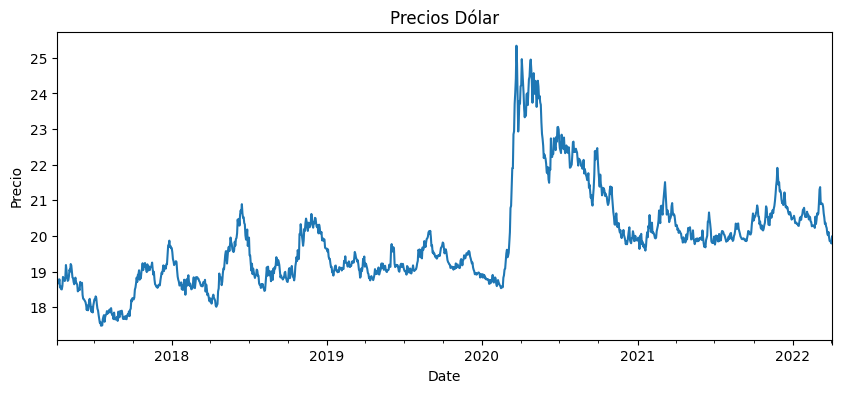

In [ ]:
diariosg['Price'].plot(figsize=(10,4), title='Precios Dólar', ylabel = 'Precio',)
plt.show()

In [ ]:
# p-valor para ver si serie es estacionaria
# ¿La serie es estacionaria?
p_value = adfuller(diariosg['Price'])[1]
print(p_value)

0.070337863916678


$$ log(a) - log(b)  = log(\dfrac{a}{b})  $$

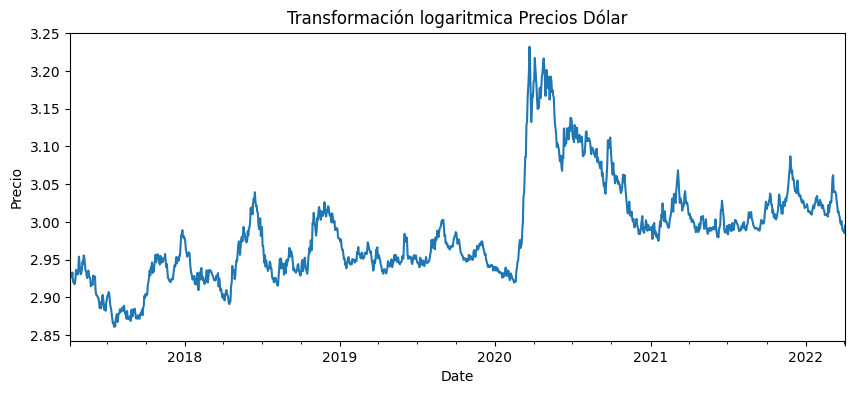

In [ ]:
diariosg['price_log'] = np.log(diariosg['Price'])
diariosg['price_log'].plot(figsize=(10,4), title='Transformación logaritmica Precios Dólar', ylabel = 'Precio',)
plt.show()

In [ ]:
diariosg['retornos_log']= diariosg['price_log'].diff()  # en la diferencia perdemos el primer registro
diariosg.head()

,Price,price_log,retornos_log
Date,,,
2017-04-05,18.8200,2.934920,NaN
2017-04-06,18.7405,2.930687,-0.004233
2017-04-07,18.6688,2.926854,-0.003833
2017-04-10,18.6787,2.927384,0.000530
2017-04-11,18.7813,2.932862,0.005478


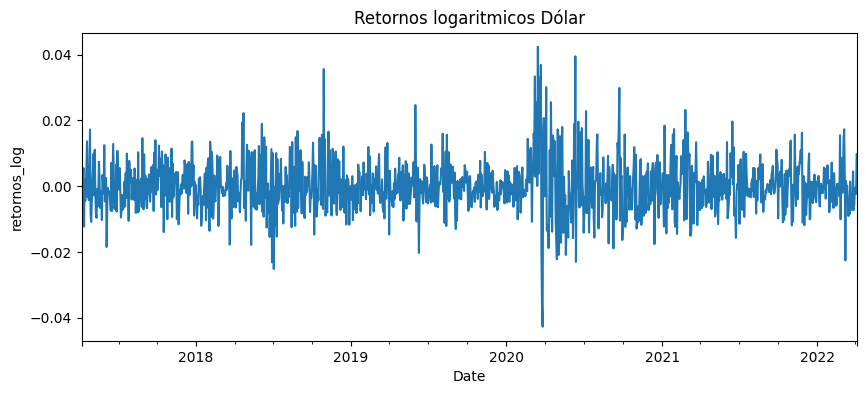

In [ ]:
diariosg['retornos_log'][1:].plot(figsize=(10,4), title='Retornos logaritmicos Dólar', ylabel = 'retornos_log')
plt.show()

In [ ]:
datitos = diariosg.copy()

<Axes: xlabel='Date'>

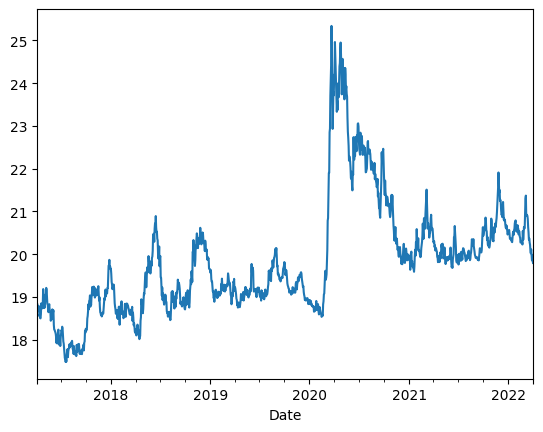

In [ ]:
# COMO EXPLORAR FACILMENTE DATOS, 'datitos' es un DataFrame

datitos['Price'].plot()

<Axes: >

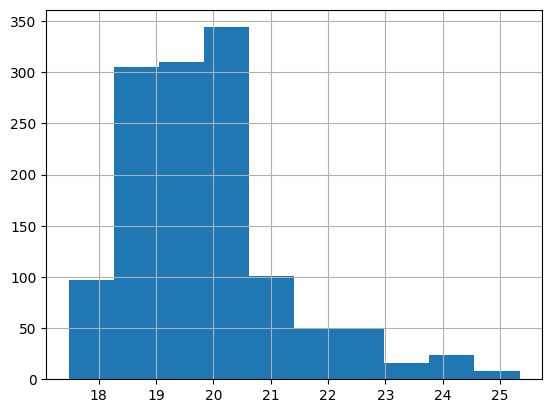

In [ ]:
datitos['Price'].hist()

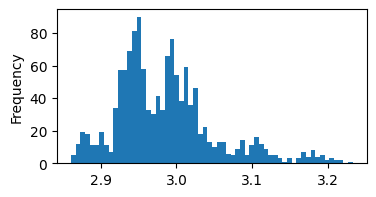

In [ ]:
plt.rc("figure", figsize=(4,2))
diariosg['price_log'].plot.hist(bins=60)
plt.show()

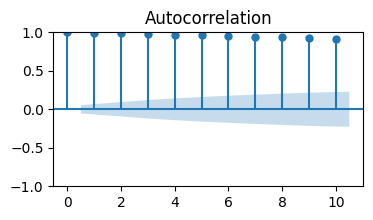

In [ ]:
plot_acf(diariosg['price_log'], lags=10)
plt.show()

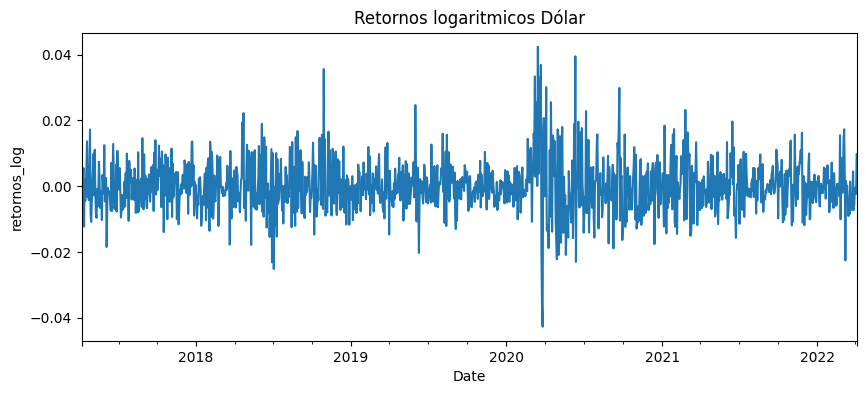

In [ ]:
# COMPARACION plots de retornos_log
diariosg['retornos_log'][1:].plot(figsize=(10,4), title='Retornos logaritmicos Dólar', ylabel = 'retornos_log',)
plt.show()

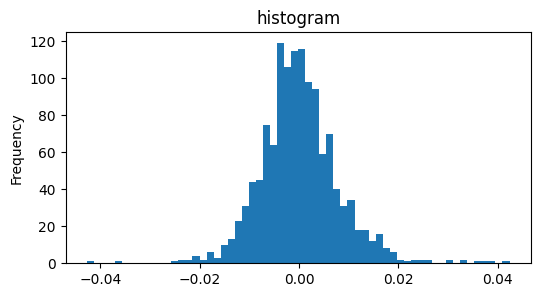

In [ ]:
plt.rc("figure", figsize=(6,3))
diariosg['retornos_log'][1:].plot.hist(bins=60, title='histogram')
plt.show()

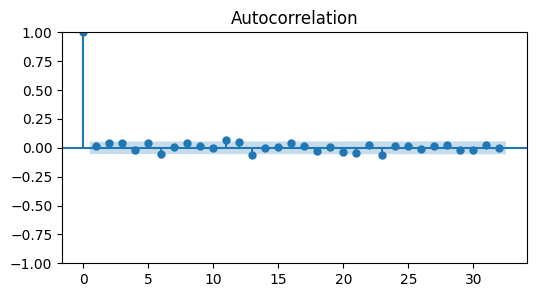

In [ ]:
plot_acf(diariosg['retornos_log'][1:])
plt.show()

In [ ]:
import scipy.stats

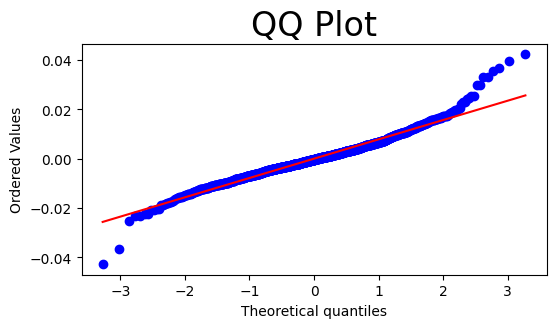

In [ ]:
scipy.stats.probplot(diariosg['retornos_log'][1:], plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [ ]:
# ¿La serie retornos log es estacionaria?
p_value = adfuller(diariosg['retornos_log'][1:])[1]
p_value

# SE rechaza hipotesis nula, siendo aceptada que es estacionaria

1.94920356380062e-15

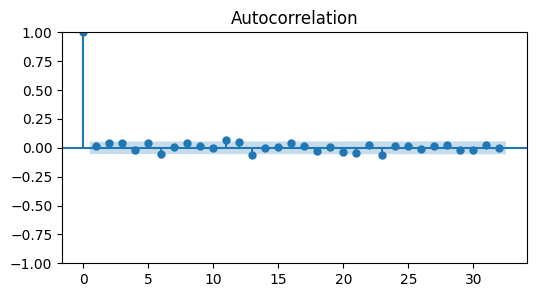

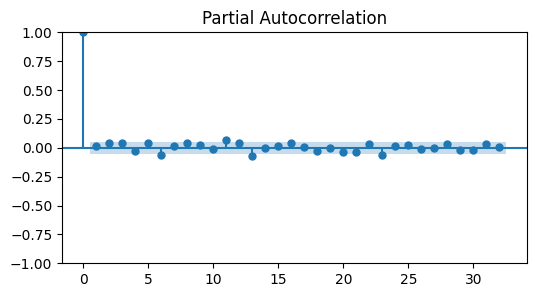

In [ ]:
plt.rc("figure", figsize=(6,3))

plot_acf(diariosg['retornos_log'][1:])
plt.show()

plot_pacf(diariosg['retornos_log'][1:])
plt.show()

In [ ]:
diariosg

,Price,price_log,retornos_log
Date,,,
2017-04-05,18.8200,2.934920,NaN
2017-04-06,18.7405,2.930687,-0.004233
2017-04-07,18.6688,2.926854,-0.003833
2017-04-10,18.6787,2.927384,0.000530
2017-04-11,18.7813,2.932862,0.005478
...,...,...,...
2022-03-30,19.8560,2.988506,-0.005424
2022-03-31,19.8450,2.987952,-0.000554
2022-04-01,19.8350,2.987448,-0.000504


In [ ]:
# MODELO ARIMA    # REVISAR SI ES FALSE para precios
model_arma = auto_arima(diariosg['retornos_log'][1:],
                        stationary= True,  stepwise=False, maxiter=200, trace=True,
                        information_criterion='aic', max_order=5)
# start_p=2, start_q=2, d=None, max_p=5, max_q=5 por default

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-8901.021, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-8899.268, Time=0.64 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=-8899.121, Time=0.92 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=-8899.278, Time=0.61 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=-8897.750, Time=1.25 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=-8898.030, Time=3.55 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=-8899.289, Time=0.41 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=-8897.021, Time=0.74 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-8896.618, Time=0.96 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=-8900.932, Time=2.71 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=-8897.324, Time=1.34 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=-8899.166, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=-8895.020, Time=0.61 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=-8893.020, Time=0.86 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=-8898.238, Time=1.34

In [ ]:
print(model_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1304
Model:                        SARIMAX   Log Likelihood                4452.511
Date:                Thu, 25 Apr 2024   AIC                          -8901.021
Time:                        23:44:54   BIC                          -8890.675
Sample:                    04-06-2017   HQIC                         -8897.140
                         - 04-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.592e-05      0.000      0.204      0.838      -0.000       0.000
sigma2      6.335e-05   1.59e-06     39.874      0.000    6.02e-05    6.65e-05
Ljung-Box (L1) (Q):                   0.27   Jarque-

In [ ]:
model_arma.predict()

2022-04-06    0.000046
2022-04-07    0.000046
2022-04-08    0.000046
2022-04-11    0.000046
2022-04-12    0.000046
2022-04-13    0.000046
2022-04-14    0.000046
2022-04-15    0.000046
2022-04-18    0.000046
2022-04-19    0.000046
Freq: B, dtype: float64

<Axes: xlabel='Date'>

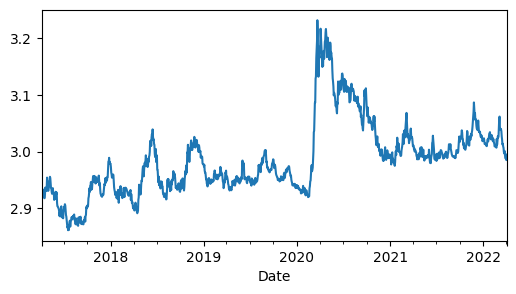

In [ ]:
diariosg['price_log'].plot()

In [ ]:
model_arima = auto_arima(diariosg['price_log'],
                        stationary= False,  stepwise=False, maxiter=200, trace=True,
                        information_criterion='aic',max_order=5)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-8901.021, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-8899.268, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-8899.121, Time=0.61 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-8899.278, Time=0.68 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-8897.750, Time=1.43 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-8898.032, Time=4.82 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-8899.289, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-8897.021, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-8896.618, Time=1.04 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-8900.932, Time=1.61 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=-8897.324, Time=2.09 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-8899.166, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=-8895.020, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=-8893.020, Time=1.14 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=-8898.238, Time=3.61

In [ ]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1305
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4452.511
Date:                Thu, 25 Apr 2024   AIC                          -8901.021
Time:                        23:47:15   BIC                          -8890.675
Sample:                    04-05-2017   HQIC                         -8897.140
                         - 04-05-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.592e-05      0.000      0.204      0.838      -0.000       0.000
sigma2      6.335e-05   1.59e-06     39.874      0.000    6.02e-05    6.65e-05
Ljung-Box (L1) (Q):                   0.27   Jarque-

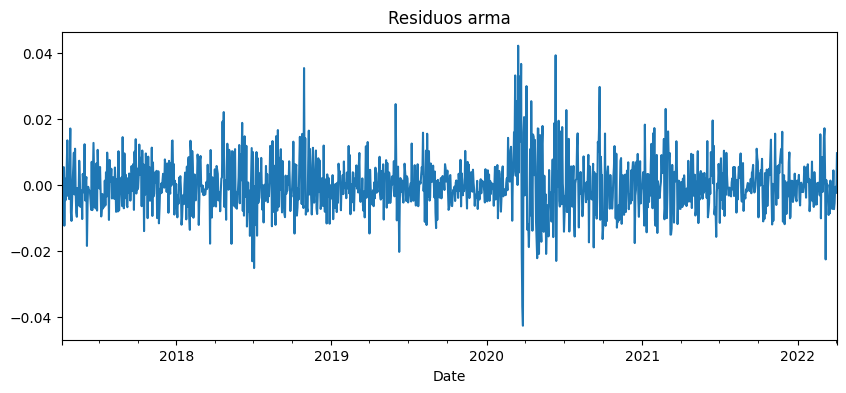

In [ ]:
# Exploración de residuos del modelo ARMA de Retornos

residuos_arma = pd.Series(model_arma.resid(), index = diariosg.index[1:])
residuos_arma.plot(figsize=(10,4), title='Residuos arma')
plt.show()

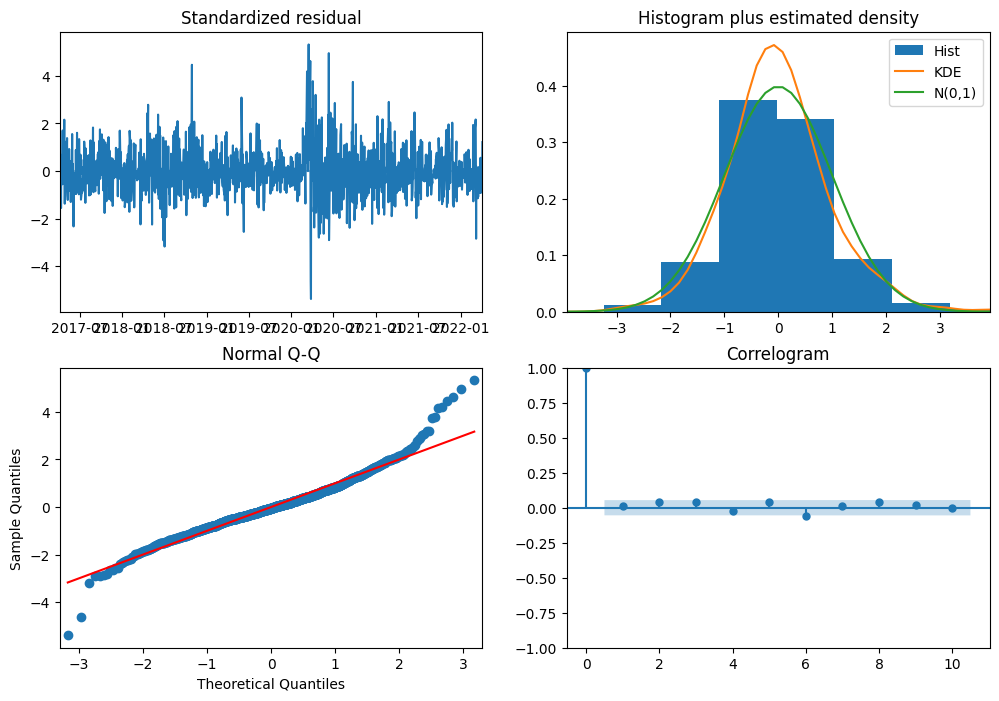

In [ ]:
model_arma.plot_diagnostics(figsize=(12,8), lags=10)
plt.show()

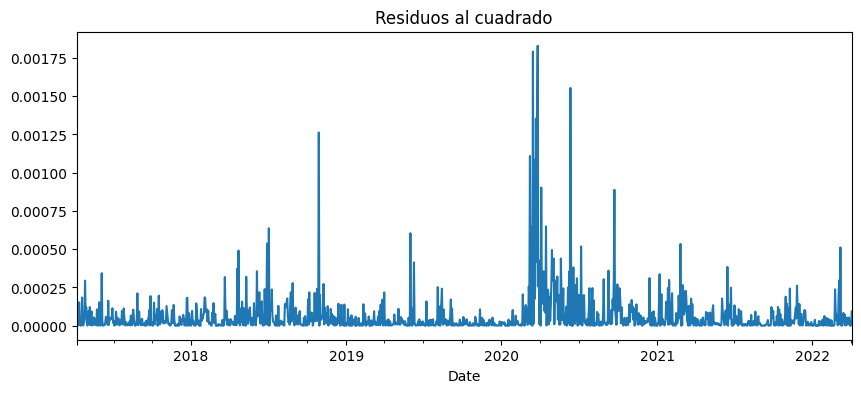

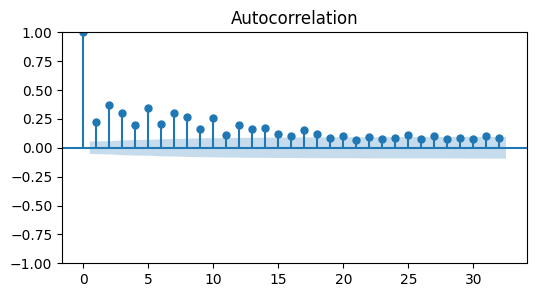

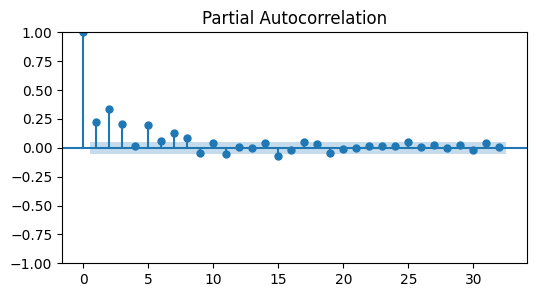

In [ ]:
res2 = pow(residuos_arma,2)

res2.plot(figsize=(10,4), title='Residuos al cuadrado')
plt.show()

plot_acf(res2)
plt.show()

plot_pacf(res2)
plt.show()

# Value at Risk

In [ ]:
# Riesgo del 5% suponiendo una distribución normal

In [ ]:
diariosg.columns

Index(['Price', 'price_log', 'retornos_log'], dtype='object')

In [ ]:
lim = diariosg['retornos_log'].quantile(0.05)
lim

-0.011647989361066724

In [ ]:
diariosg['riesgo_5pc_cte'] = np.nan
diariosg['riesgo_5pc_cte'][1:]=lim

In [ ]:
diariosg

,Price,price_log,retornos_log,riesgo_5pc_cte
Date,,,,
2017-04-05,18.8200,2.934920,NaN,NaN
2017-04-06,18.7405,2.930687,-0.004233,-0.011648
2017-04-07,18.6688,2.926854,-0.003833,-0.011648
2017-04-10,18.6787,2.927384,0.000530,-0.011648
2017-04-11,18.7813,2.932862,0.005478,-0.011648
...,...,...,...,...
2022-03-30,19.8560,2.988506,-0.005424,-0.011648
2022-03-31,19.8450,2.987952,-0.000554,-0.011648
2022-04-01,19.8350,2.987448,-0.000504,-0.011648


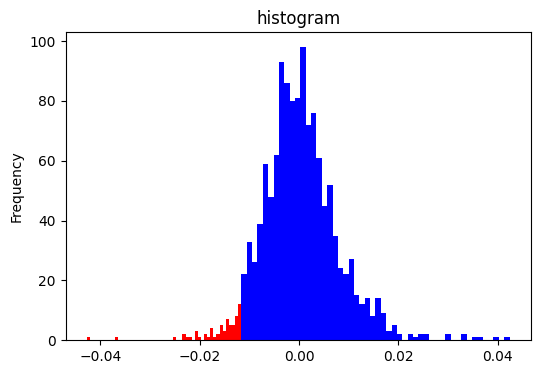

In [ ]:
plt.rc("figure", figsize=(6,4))

diariosg['retornos_log'][lambda x:x>=lim].plot.hist(bins=50, title='histogram', color='blue')
diariosg['retornos_log'][lambda x:x<lim].plot.hist(bins=50, title='histogram', color='r')
plt.show()

In [ ]:
from scipy.stats import norm
lim2 = norm(loc = 0 , scale = 1).ppf(0.05)
lim2

-1.6448536269514729

In [ ]:
diariosg

,Price,price_log,retornos_log,riesgo_5pc_cte
Date,,,,
2017-04-05,18.8200,2.934920,NaN,NaN
2017-04-06,18.7405,2.930687,-0.004233,-0.011648
2017-04-07,18.6688,2.926854,-0.003833,-0.011648
2017-04-10,18.6787,2.927384,0.000530,-0.011648
2017-04-11,18.7813,2.932862,0.005478,-0.011648
...,...,...,...,...
2022-03-30,19.8560,2.988506,-0.005424,-0.011648
2022-03-31,19.8450,2.987952,-0.000554,-0.011648
2022-04-01,19.8350,2.987448,-0.000504,-0.011648


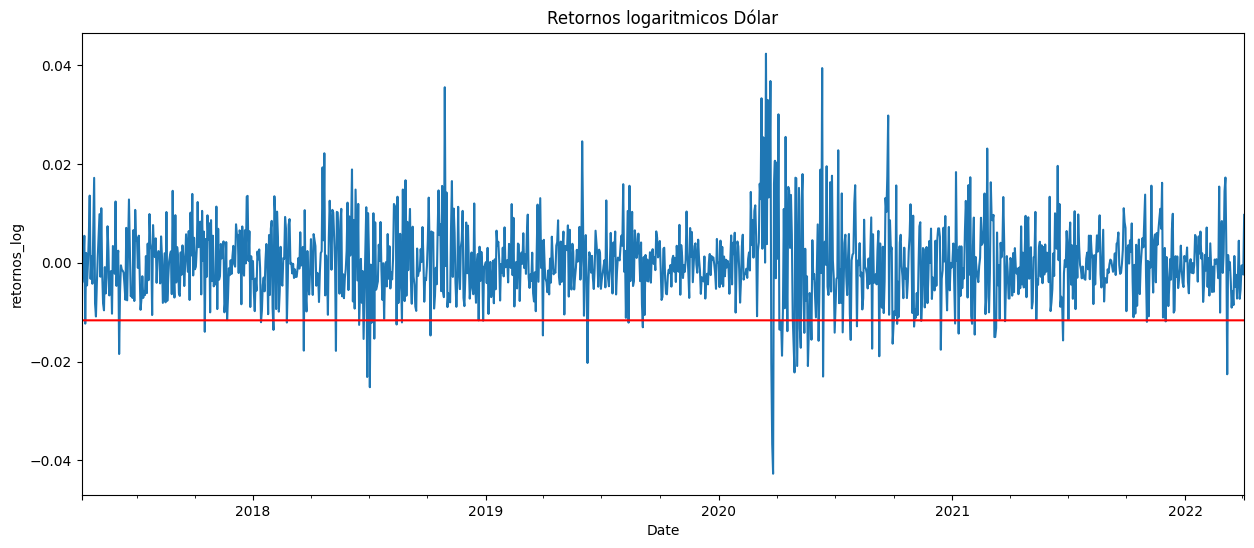

In [ ]:
diariosg['retornos_log'][1:].plot(figsize=(15,6), title='Retornos logaritmicos Dólar', ylabel = 'retornos_log')
diariosg['riesgo_5pc_cte'][1:].plot(c='r')

plt.show()

In [ ]:
1000000*(1 + lim)

988352.0106389333

# Predicción con ARIMA

Text(0.5, 1.0, 'Predicción del precio con ARIMA')

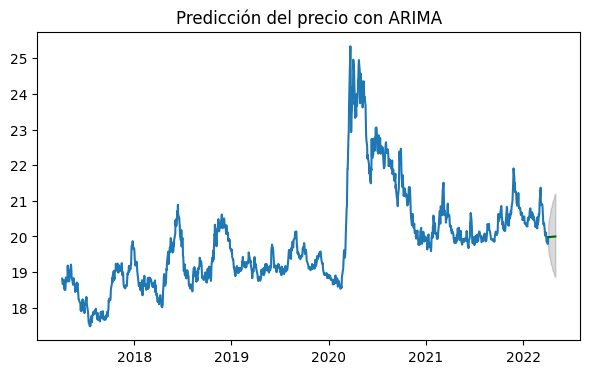

In [ ]:
n_periods = 20
fc_log, confint_log = model_arima.predict(n_periods=n_periods,  return_conf_int=True, alpha=0.1)
fc, confint = np.exp(fc_log), np.exp(confint_log)

# Vamos a crear una serie para graficar más facilmente
ix_fc = pd.date_range( start='2022-04-05', periods=n_periods, freq='B')  # 2022-04-05 es la fecha final a la que le queremos predecir
fc_series = pd.Series(fc, ix_fc )

lower_series = pd.Series(confint[:, 0],  index=ix_fc )
upper_series = pd.Series(confint[:, 1],  index=ix_fc )

# Plot
plt.rc("figure", figsize=(7,4))
plt.plot(diariosg['Price'])

plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("Predicción del precio con ARIMA")

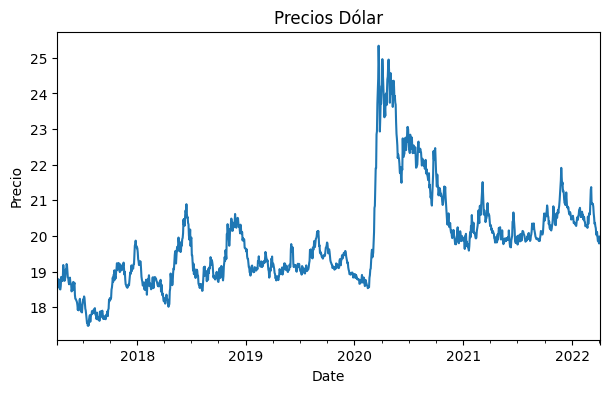

In [ ]:
# Recordemos el original
diariosg['Price'].plot(figsize=(7,4), title='Precios Dólar', ylabel = 'Precio')
plt.show()